In [51]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("../artifacts/heart_disease_health_indicators.csv")

In [6]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
98237,0.0,1.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,8.0
64208,0.0,1.0,1.0,1.0,33.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,4.0,30.0,30.0,1.0,1.0,10.0,5.0,8.0
48752,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,7.0,2.0,0.0,0.0,1.0,5.0,7.0
253002,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,3.0
154582,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,20.0,0.0,0.0,0.0,4.0,5.0,3.0


In [8]:
df.shape

(253680, 22)

In [9]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

In [11]:
df['Diabetes'].value_counts()

Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [12]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
df['Age'].value_counts().sort_index()

Age
1.0      5700
2.0      7598
3.0     11123
4.0     13823
5.0     16157
6.0     19819
7.0     26314
8.0     30832
9.0     33244
10.0    32194
11.0    23533
12.0    15980
13.0    17363
Name: count, dtype: int64

In [14]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [15]:
pd.crosstab(df['HighBP'], df['HeartDiseaseorAttack'], normalize='index')

HeartDiseaseorAttack,0.0,1.0
HighBP,,
0.0,0.958820,0.041180
1.0,0.835264,0.164736


## ADD the columns (vaccinated and had covid)

In [16]:
np.random.seed(42)
df['Vaccinated']=np.random.choice([0,1],size=len(df),p=[0.3,0.7])

In [17]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Vaccinated
66754,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,7.0,0
49783,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,3.0,0
38085,0.0,1.0,1.0,1.0,30.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,5.0,1.0,0.0,11.0,5.0,7.0,0
30910,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,7.0,5.0,8.0,0
27978,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,4.0,5.0,8.0,1


In [18]:
df['Had_COVID']=np.random.choice([0,1],size=len(df),p=[0.6,0.4])

In [19]:
df.sample(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Vaccinated,Had_COVID
52025,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0,1,0
106026,0.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,3.0,23.0,6.0,1.0,0.0,8.0,4.0,6.0,0,1
86331,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,14.0,0.0,0.0,3.0,6.0,8.0,0,0
1026,1.0,1.0,0.0,1.0,32.0,1.0,0.0,2.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,10.0,4.0,4.0,1,1
244946,0.0,1.0,0.0,1.0,25.0,1.0,0.0,2.0,1.0,1.0,...,2.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,1,1


In [20]:
df['Vaccinated'].value_counts(normalize=True)

Vaccinated
1    0.700753
0    0.299247
Name: proportion, dtype: float64

In [21]:
df['Had_COVID'].value_counts(normalize=True)

Had_COVID
0    0.600382
1    0.399618
Name: proportion, dtype: float64

## Define the inputs and Outputs

X - Features and Y - Targets 

In [22]:
X = df.drop(columns=['HeartDiseaseorAttack','Diabetes'])

In [23]:
y_heart = df['HeartDiseaseorAttack']

### Train Test Split

In [24]:
x_train,x_test,y_heart_train,y_heart_test = train_test_split(X,y_heart,test_size=0.2,random_state=42,stratify=y_heart)

In [25]:
x_train.shape

(202944, 22)

In [26]:
x_test.shape

(50736, 22)

In [27]:
y_heart_train.shape

(202944,)

In [28]:
y_heart_test.shape

(50736,)

## Feature Scaling

some features have big ranges and ML models learn better features are on similar scale. That's why scalling is needed in BMI(10-60) / Age(1-13)/ Income(1-8) are feature scaled. Here I used standard scaler for feature scaling


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

fit_transform - training data    
transform - testing data

In [30]:
x_train_scaled.shape

(202944, 22)

In [31]:
x_test_scaled.shape

(50736, 22)

In [56]:
## save the scaler 
joblib.dump(scaler, "../artifacts/scaler.pkl")

['../artifacts/scaler.pkl']

# Train the ML Model

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
heart_model = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=42)
heart_model.fit(x_train_scaled,y_heart_train)
y_heart_pred = heart_model.predict(x_test_scaled)

In [33]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report)
accuracy = accuracy_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
f1 = f1_score(y_heart_test, y_heart_pred)
cm = confusion_matrix(y_heart_test, y_heart_pred)

accuracy, precision, recall, f1, cm

(0.9070088300220751,
 0.5277020890099909,
 0.12157355095208203,
 0.19761904761904764,
 array([[45437,   520],
        [ 4198,   581]]))

In [34]:
y_heart_pred

array([0., 0., 0., ..., 0., 0., 0.])

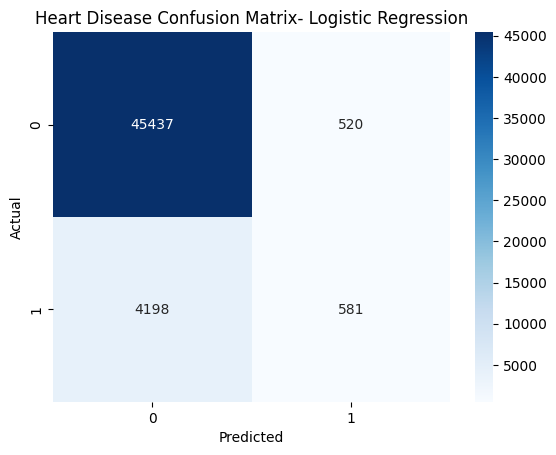

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heart Disease Confusion Matrix- Logistic Regression")
plt.show()

In [36]:
y_heart_prob = heart_model.predict_proba(x_test_scaled)
print(y_heart_prob)

[[0.6159559  0.3840441 ]
 [0.92480096 0.07519904]
 [0.98131793 0.01868207]
 ...
 [0.84957678 0.15042322]
 [0.97402848 0.02597152]
 [0.98117422 0.01882578]]


In [37]:
## Classification report

In [38]:
print(classification_report(y_heart_test, y_heart_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45957
         1.0       0.53      0.12      0.20      4779

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.88      0.91      0.88     50736



## Cross Validation Setup

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ConfusionMatrix": confusion_matrix(y_true, y_pred)
    }

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(x_train, y_heart_train)

y_rf_pred = rf_model.predict(x_test)

Random_Forest = evaluate_model(y_heart_test,y_rf_pred)
print(Random_Forest)


{'Accuracy': 0.9074424471775465, 'Precision': 0.575591985428051, 'Recall': 0.06612261979493618, 'F1': 0.11861861861861864, 'ConfusionMatrix': array([[45724,   233],
       [ 4463,   316]])}


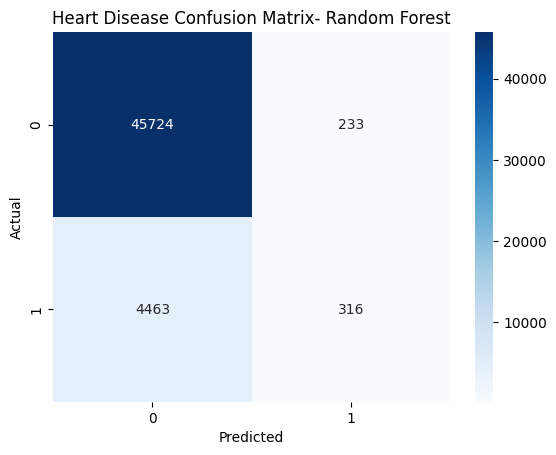

In [41]:
cm_rf = confusion_matrix(y_heart_test,y_rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heart Disease Confusion Matrix- Random Forest")
plt.show()

In [42]:
print(classification_report(y_heart_test, y_rf_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.58      0.07      0.12      4779

    accuracy                           0.91     50736
   macro avg       0.74      0.53      0.53     50736
weighted avg       0.88      0.91      0.87     50736



## SVM - Linear SVC (suitable for large datasets)

In [43]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)

svm_model.fit(x_train_scaled, y_heart_train)

y_svm_pred = svm_model.predict(x_test_scaled)

SVM = evaluate_model(y_heart_test,y_svm_pred)

print(SVM)

/Volumes/My Disk 2/My Projects/HealthCare/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Accuracy': 0.7454470198675497, 'Precision': 0.24279210925644917, 'Recall': 0.8035153797865662, 'F1': 0.3729060451565914, 'ConfusionMatrix': array([[33981, 11976],
       [  939,  3840]])}


/Volumes/My Disk 2/My Projects/HealthCare/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


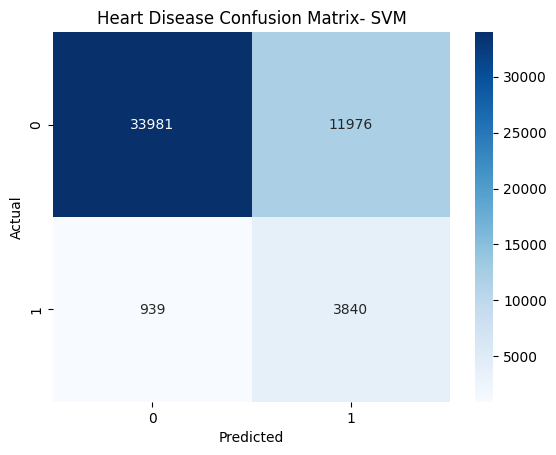

In [44]:
cm_svm = confusion_matrix(y_heart_test,y_svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heart Disease Confusion Matrix- SVM")
plt.show()

In [53]:
## Save the Heart Disease Model 

In [52]:
joblib.dump(rf_model, "../artifacts/heart_disease_model.pkl")

['../artifacts/heart_disease_model.pkl']

# Diabetics Model Creation

In [45]:
# 0 = No diabetes, 1 = Diabetes or Prediabetes
df['Diabetes'] = df['Diabetes'].apply(lambda x: 0 if x == 0 else 1)

In [46]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Vaccinated,Had_COVID
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,1,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0,1


In [47]:
y_diabetes= df['Diabetes']

In [48]:
x_train_d, x_test_d, y_diab_train, y_diab_test = train_test_split(
    X,
    y_diabetes,
    test_size=0.2,
    random_state=42,
    stratify=y_diabetes
)

### Train Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_diabetes = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42
)

rf_diabetes.fit(x_train_d, y_diab_train)

y_diab_pred = rf_diabetes.predict(x_test_d)

diabetes_results = evaluate_model(y_diab_test, y_diab_pred)

print(diabetes_results)

{'Accuracy': 0.8519197414064964, 'Precision': 0.62134944612286, 'Recall': 0.15434646654158848, 'F1': 0.24726981264402365, 'ConfusionMatrix': array([[41989,   752],
       [ 6761,  1234]])}


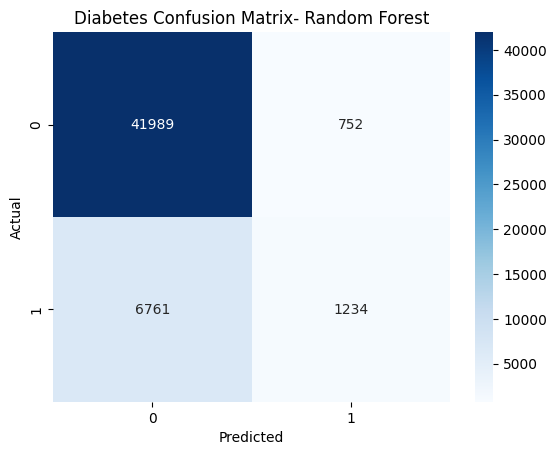

In [50]:
cm_diabetes = confusion_matrix(y_diab_test,y_diab_pred)
sns.heatmap(cm_diabetes, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Diabetes Confusion Matrix- Random Forest")
plt.show()

In [54]:
## Save the Diabetes model
joblib.dump(rf_diabetes, "../artifacts/diabetes_model.pkl")

['../artifacts/diabetes_model.pkl']

# Create Prediction Pipeline